# 09_2.Two-Way ANOVA(연습문제)
- https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
twa_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/09_2.ToothGrowth.csv', encoding="cp949")
twa_df.head()

,len,supp,dose
0,4.2,VC,500
1,11.5,VC,500
2,7.3,VC,500
3,5.8,VC,500
4,6.4,VC,500


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
#twa_df['supp'].replace({1:'200도', 2:'300도'}, inplace=True)
#twa_df['dose'].replace({1:'오븐', 2:'기름'}, inplace=True)
twa_df['supp'] = twa_df['supp'].astype('category')
twa_df['dose'] = twa_df['dose'].astype('category')

twa_df.head()

,len,supp,dose
0,4.2,VC,500
1,11.5,VC,500
2,7.3,VC,500
3,5.8,VC,500
4,6.4,VC,500


### 2.3 자료구조 살펴보기

In [ ]:
twa_df.shape

(60, 3)

In [ ]:
twa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   len     60 non-null     float64 
 1   supp    60 non-null     category
 2   dose    60 non-null     category
dtypes: category(2), float64(1)
memory usage: 984.0 bytes


In [ ]:
twa_df.columns

Index(['len', 'supp', 'dose'], dtype='object')

## 3.기술통계

In [ ]:
# 그룹별 기술통계
twa_df.groupby(["supp","dose"])["len"].describe().round(3)

count   mean    std   min     25%    50%     75%   max
supp dose                                                        
OJ   500    10.0  13.23  4.460   8.2   9.700  12.25  16.175  21.5
     1000   10.0  22.70  3.911  14.5  20.300  23.45  25.650  27.3
     2000   10.0  26.06  2.655  22.4  24.575  25.95  27.075  30.9
VC   500    10.0   7.98  2.747   4.2   5.950   7.15  10.900  11.5
     1000   10.0  16.77  2.515  13.6  15.275  16.50  17.300  22.5
     2000   10.0  26.14  4.798  18.5  23.375  25.95  28.800  33.9

## 4.TW-ANOVA

### 4.1 상호작용효과 있을때

In [ ]:
# 상호작용효과를 검증할때
# ss_type = 3
pg.anova(dv = 'len',
         between = ["supp","dose"],
         ss_type = 3,
         data = twa_df).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,supp,205.350,1,205.350,15.572,0.000,0.224
1,dose,2426.434,2,1213.217,92.000,0.000,0.773
2,supp * dose,108.319,2,54.159,4.107,0.022,0.132
3,Residual,712.106,54,13.187,NaN,NaN,NaN


In [ ]:
# post-hoc test: 상호작용효과 있을때
pg.pairwise_tests(dv = 'len',
                  between = ["supp","dose"],
                  data = twa_df).round(3)

,Contrast,supp,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,supp,-,VC,OJ,False,True,-1.915,58.0,two-sided,0.060,1.199,-0.488
1,dose,-,500,1000,False,True,-6.477,38.0,two-sided,0.000,8.179e+04,-2.007
2,dose,-,500,2000,False,True,-11.799,38.0,two-sided,0.000,1.42e+11,-3.657
3,dose,-,1000,2000,False,True,-4.900,38.0,two-sided,0.000,953.473,-1.519
4,supp * dose,VC,500,1000,False,True,-7.463,18.0,two-sided,0.000,1.582e+04,-3.197
5,supp * dose,VC,500,2000,False,True,-10.388,18.0,two-sided,0.000,1.319e+06,-4.449
6,supp * dose,VC,1000,2000,False,True,-5.470,18.0,two-sided,0.000,492.583,-2.343
7,supp * dose,OJ,500,1000,False,True,-5.049,18.0,two-sided,0.000,229.445,-2.162
8,supp * dose,OJ,500,2000,False,True,-7.817,18.0,two-sided,0.000,2.823e+04,-3.348
9,supp * dose,OJ,1000,2000,False,True,-2.248,18.0,two-sided,0.037,2.063,-0.963


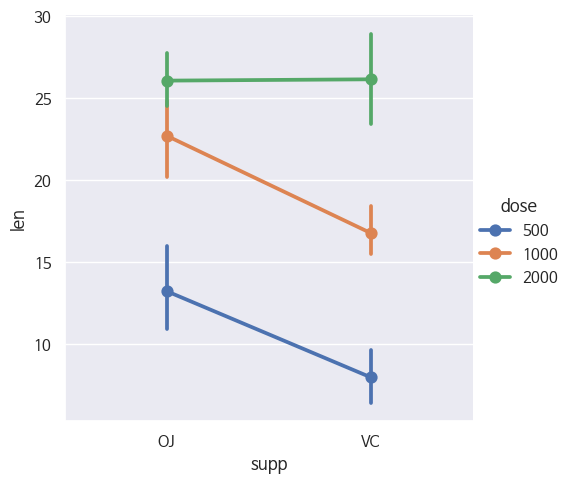

In [ ]:
# 평균반응 프로파일 plot
sns.catplot(x = "supp",
            y = "len",
            hue = "dose",
            kind = "point",
            data = twa_df)
plt.show()

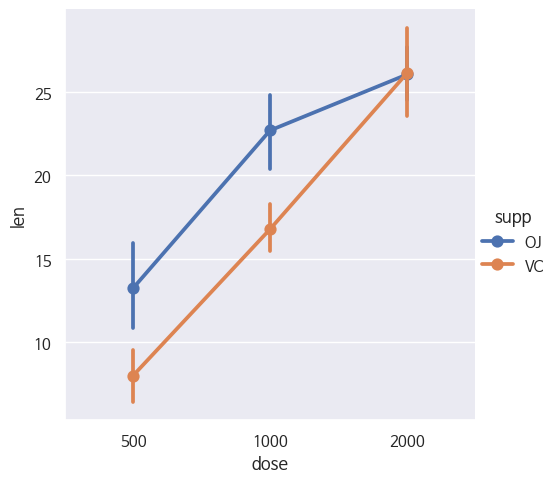

In [ ]:
# 평균반응 프로파일 plot
sns.catplot(x = "dose",
            y = "len",
            hue = "supp",
            kind = "point",
            data = twa_df)
plt.show()

## 5.등분산검정
- 변수가 2개 이므로 bioinfokit package 사용

In [ ]:
!pip install bioinfokit

In [ ]:
from bioinfokit.analys import stat
res = stat()
res.levene(df=twa_df, res_var='len', xfac_var=['supp', 'dose'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.7086
1,Degrees of freedom (Df),5.0000
2,p value,0.1484


## 6.정규성 검정

In [ ]:
# 잔차의 정규성을 검정해야 함
# pg 모형는 잔차가 없어서 statsmodels를 이용해야 함
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('len ~ C(supp)+C(dose)+C(supp):C(dose)', data = twa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.985,0.669,True
